In [ ]:
!mamba env update -f environemnt.yml --prune

In [1]:
# pip install -U pygfx glfw jupyter_rfb pylinalg

from itertools import groupby

import trimesh

from ada.occ.tessellating import BatchTessellator
from ada.param_models.primitives_generators import BoxGenerator
from ada.visit.gltf.optimize import concatenate_stores
from ada.visit.gltf.store import merged_mesh_to_trimesh_scene
from ada.visit.render_backend import SqLiteBackend
from ada.visit.render_pygfx import RendererPyGFX

In [ ]:
def create_scene():
    bg = BoxGenerator(grid_size=4)
    shape_grid = bg.generate_box_grid()

    bt = BatchTessellator()
    all_shapes = sorted(bt.batch_tessellate(shape_grid), key=lambda x: x.material)

    scene = trimesh.Scene(base_frame=bg.graph.top_level.name)
    scene.metadata["meta"] = bg.graph.create_meta(suffix="")
    for mat_id, meshes in groupby(all_shapes, lambda x: x.material):
        merged_store = concatenate_stores(meshes)
        merged_mesh_to_trimesh_scene(scene, merged_store, bt.get_mat_by_id(mat_id), mat_id, bg.graph)

    return scene

RFBOutputContext()

[2023-05-23 14:04:51,586: WARNING/wgpu] | Missing extensions: ["VK_KHR_timeline_semaphore"]


JupyterWgpuCanvas()
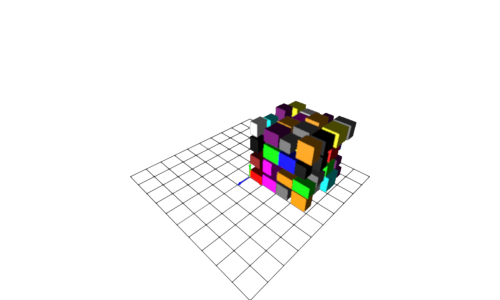

In [2]:
scene = create_scene()
render = RendererPyGFX(render_backend=SqLiteBackend("temp/meshes_jupyter4.db"))
render.add_trimesh_scene(scene, "boxes", True)
render.show()